# import Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression 
## This statement allows the visuals to render within your Jupyter Notebook.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import plotly.express as px
#from ydata_profiling import ProfileReport
%matplotlib inline

### 1- is The data Reliable : Yes it is because is from the larget website for transfor market https://www.transfermarkt.com/

### 2- is The data Timeliness : No it is from 2 season 2021-2022 and 2022-2023 

### 3- is The data Consistency : Yes

In [8]:
# read The Csv file as DataFream
df_ball = pd.read_csv("final_data.csv")
df_ball.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [9]:
# Explor data using ydata libaray
#ProfileReport(df_ball, title="Profiling Report")

# Preprocess the Data
## 1. Simple EDA + Data Quality checking

In [10]:
df_ball["clean sheets"]

0        0.335463
1        0.207055
2        0.924658
3        0.000000
4        0.000000
           ...   
10749    0.000000
10750    0.000000
10751    0.000000
10752    0.000000
10753    0.000000
Name: clean sheets, Length: 10754, dtype: float64

In [11]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [12]:
# Check if there is duplicated values
df_ball.duplicated().value_counts()

False    10754
Name: count, dtype: int64

In [13]:
# Check if there is null values
df_ball.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [14]:
# check if we can encode teams
check_teams = df_ball["team"].value_counts()

check_teams[check_teams < 25]

team
Leeds United                   24
Central Coast Mariners         24
Club Atlético Tucumán          24
CA Independiente               24
CA Vélez Sarsfield             24
Twente Enschede FC             24
PSV Eindhoven                  24
CA Colon                       24
Club Necaxa                    24
Rio Ave FC                     24
Bristol City                   24
Stoke City                     24
Preston North End              24
Fulham FC                      24
Manchester City                24
FK Rostov                      24
Real Valladolid CF             24
Real Madrid                    24
CF Monterrey                   24
Sparta Rotterdam               24
UNAM Pumas                     24
Deportivo Toluca               24
RCD Mallorca                   24
Sevilla FC                     24
Villarreal CF                  23
Arsenal FC                     23
Sydney FC                      23
CD Godoy Cruz Antonio Tomba    23
Zenit St. Petersburg           23
Dynamo Mo

# some personl Q (:

In [15]:
df_top10 =df_ball.sort_values(by="highest_value" , ascending=False).head(10)
fig= px.bar(df_top10 , x="name", y = "highest_value",width=1000,height=700)
fig

In [16]:
df_top10 =df_ball.sort_values(by="award" , ascending=False).head(10)
fig= px.bar(df_top10 , x="name", y = "award",width=1000,height=700)
fig

In [17]:
df_postions =df_ball["position"].value_counts()
fig = px.pie(df_postions , names=df_postions.index , values= df_postions.values)
fig

In [18]:
# Remove Columns That we will not Use it 
df_ball = df_ball.drop(columns=["player","team","name"], axis=1)

In [19]:
df_ball.columns

Index(['position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

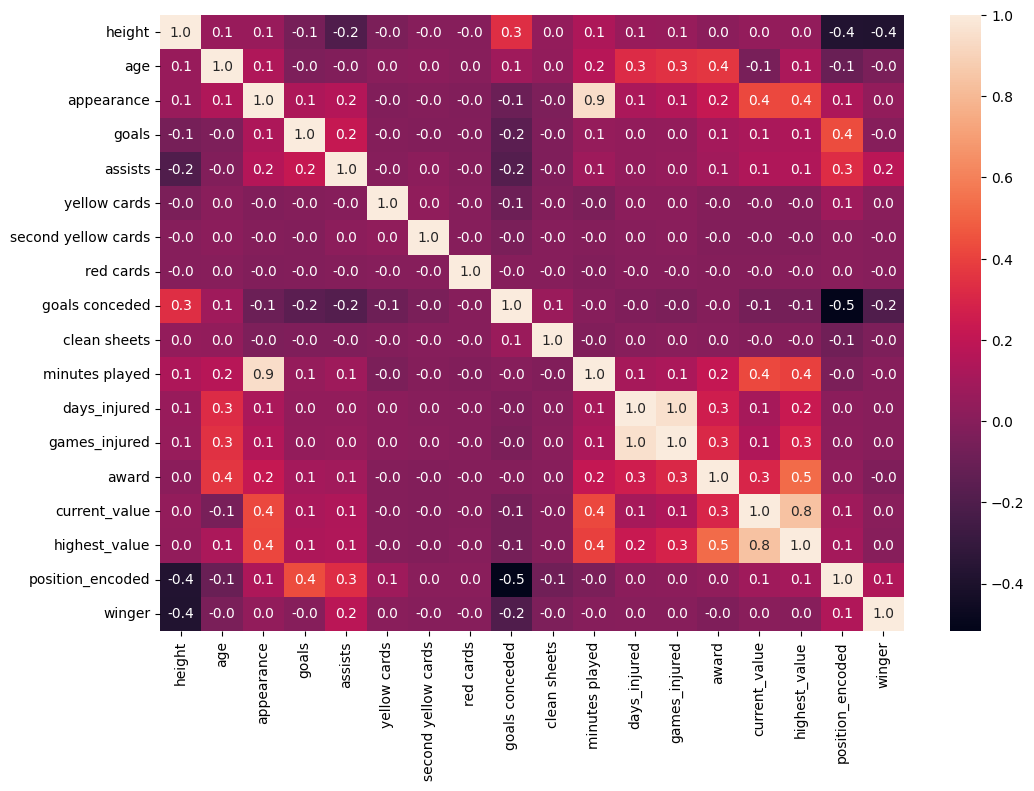

In [20]:
# find the corrlation bettween columns
corr = df_ball.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,fmt=".1f")
plt.show()

# Scatter plot for some relations

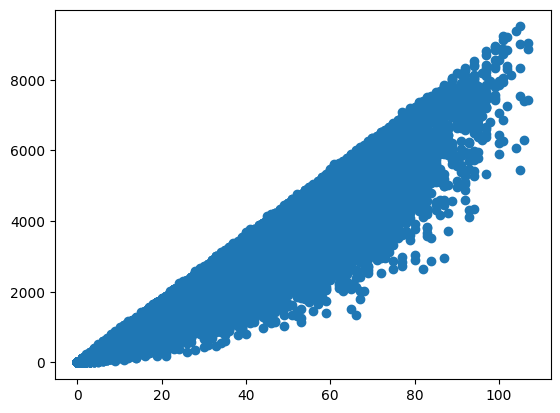

In [21]:
# check corrlation between appearance and miuntes played
plt.scatter(df_ball["appearance"],df_ball["minutes played"])
plt.show()

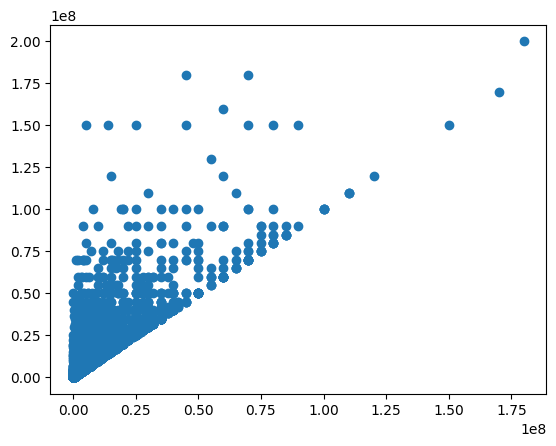

In [22]:
plt.scatter(df_ball["current_value"],df_ball["highest_value"])
plt.show()

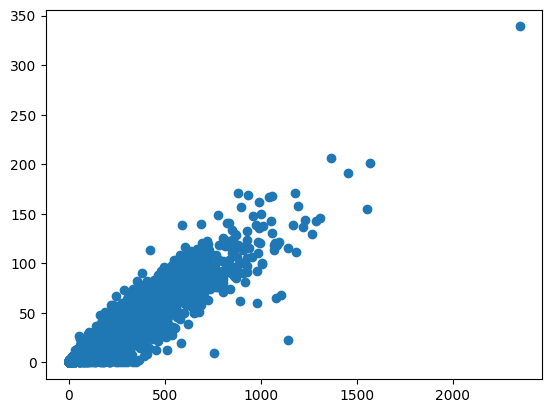

In [23]:
plt.scatter(df_ball["days_injured"],df_ball["games_injured"])
plt.show()

# Remove Outlier

(9494, 19)

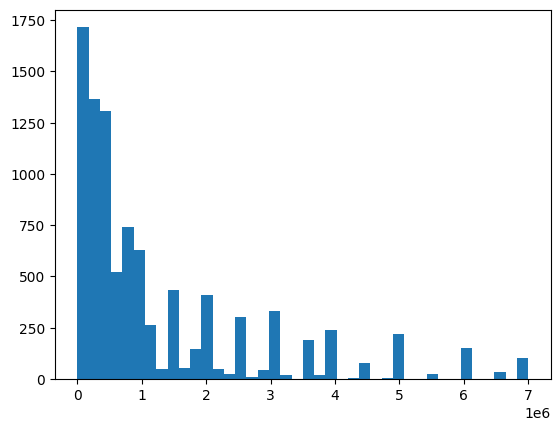

In [24]:
# cut the values the above 15m 
df_ball = df_ball[df_ball["current_value"] < 7500000]
plt.hist(df_ball["current_value"],bins=40)
df_ball.shape

(8784, 19)

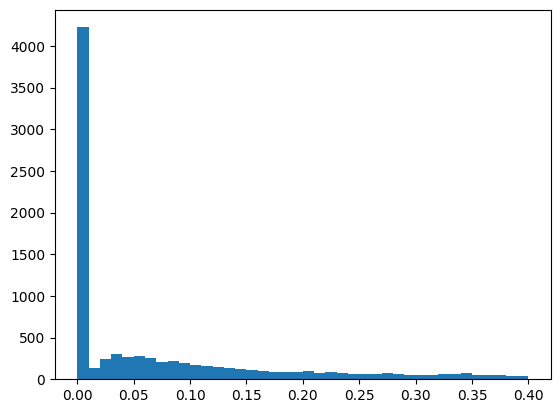

In [25]:
df_ball = df_ball[df_ball["goals"] <= 0.4]
plt.hist(df_ball["goals"],bins=40)
df_ball.shape

(8300, 19)

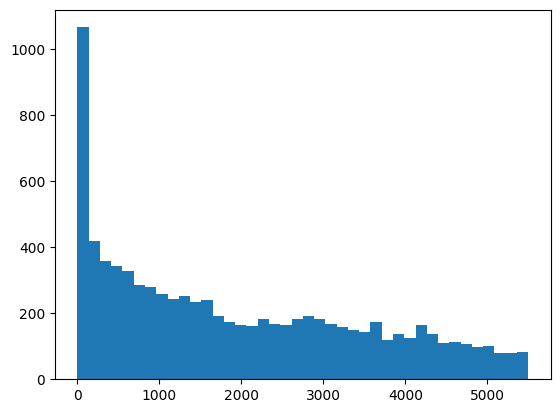

In [26]:
df_ball = df_ball[df_ball["minutes played"] <= 5500]
plt.hist(df_ball["minutes played"],  bins=40)
df_ball.shape


(6819, 19)

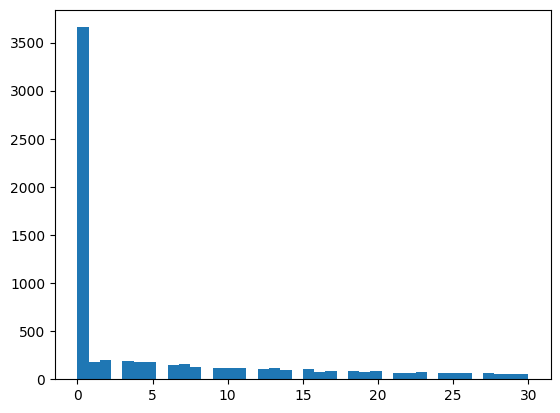

In [27]:
df_ball = df_ball[df_ball["games_injured"] <= 30]
plt.hist(df_ball["games_injured"],  bins=40)
df_ball.shape

(6136, 19)

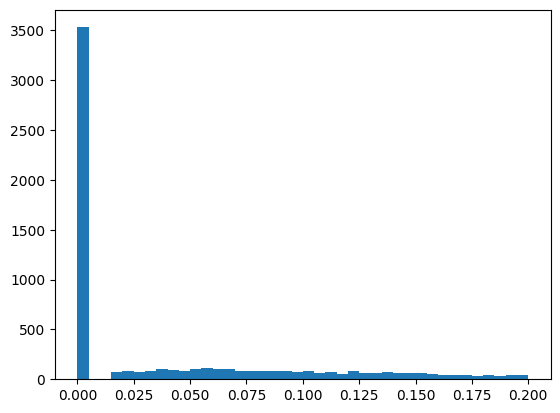

In [28]:
df_ball= df_ball[df_ball["assists"] <= 0.20]
plt.hist(df_ball["assists"],  bins=40)
df_ball.shape

(5895, 19)

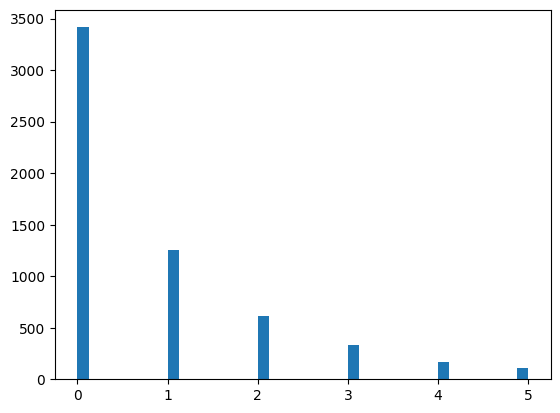

In [29]:
df_ball= df_ball[df_ball["award"] <= 5]
plt.hist(df_ball["award"],  bins=40)
df_ball.shape

(5805, 19)

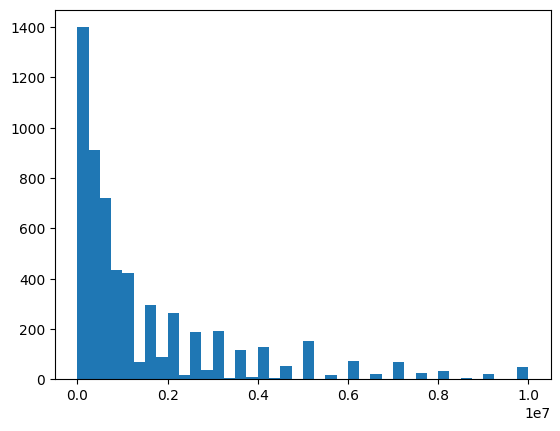

In [30]:
df_ball= df_ball[df_ball["highest_value"] <= 10000000]
plt.hist(df_ball["highest_value"],  bins=40)
df_ball.shape

In [31]:
df_ball.shape

(5805, 19)

####  Feature engineering

In [32]:
categorical_features = ["position"]
df_ball = pd.get_dummies(df_ball, columns=categorical_features)

In [33]:
df_ball.shape

(5805, 34)

####  Feature selection

In [34]:
corr = df_ball.corr(numeric_only=True)
corr["current_value"].sort_values(ascending=False)

current_value                          1.000000
highest_value                          0.804560
appearance                             0.346023
minutes played                         0.327110
assists                                0.205476
games_injured                          0.201149
award                                  0.162807
days_injured                           0.154446
goals                                  0.152778
position_encoded                       0.085496
position_midfield-CentralMidfield      0.070187
position_Defender Centre-Back          0.050362
second yellow cards                    0.044234
winger                                 0.037648
position_midfield-DefensiveMidfield    0.035558
position_Attack-LeftWinger             0.027886
position_Defender Left-Back            0.026127
position_Attack-RightWinger            0.018507
yellow cards                           0.017387
height                                 0.009387
position_Defender Right-Back           0

In [35]:
threshold = 0.14  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = corr[abs(corr['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_Goalkeeper'],
      dtype='object')

In [36]:
# select the columns that have corr with our target 
df_ball_1 = df_ball[selected_features]
df_ball_1.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,position_Goalkeeper
8,34,0.000000,0.000000,2758,47,13,0,2000000,2000000,False
20,39,0.129125,0.064562,2788,0,0,1,800000,800000,False
21,51,0.153759,0.102506,3512,0,0,1,800000,800000,False
28,34,0.000000,0.087379,1030,90,15,1,3000000,7000000,False
56,31,0.000000,0.000000,2790,89,14,0,600000,3500000,True


In [37]:
# drop this columns because they have corrlation with other indeependent varible
df_ball_1.drop(columns=["appearance","days_injured"],axis=1,inplace=True)

C:\Users\zyad abdallah\AppData\Local\Temp\ipykernel_14260\2808414621.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
df_ball_1.head()

,goals,assists,minutes played,games_injured,award,current_value,highest_value,position_Goalkeeper
8,0.000000,0.000000,2758,13,0,2000000,2000000,False
20,0.129125,0.064562,2788,0,1,800000,800000,False
21,0.153759,0.102506,3512,0,1,800000,800000,False
28,0.000000,0.087379,1030,15,1,3000000,7000000,False
56,0.000000,0.000000,2790,14,0,600000,3500000,True


# Traing Step

In [39]:
x = df_ball_1.drop(['current_value'], axis=1)
y = df_ball_1['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled.shape

(4644, 7)

In [41]:
X_test_scaled.shape

(1161, 7)

## Buliding the Model


In [42]:
model = LinearRegression()

In [43]:
param_grid = {
    'fit_intercept': [True,False] 
}
# Initialize a GridSearchCV object
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

## Train The model

In [44]:
#model.fit(X_train_scaled,y_train)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [45]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'fit_intercept': True}


## Test The Model

In [46]:
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Model MSE:, {mse:2e}")

Best Model MSE:, 5.101996e+11


### Interpretation of the Model

In [47]:
coeff_df = pd.DataFrame(best_model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
goals,3.054588e+03
assists,1.917608e+04
minutes played,9.767783e+04
games_injured,-6.408789e+04
award,-5.177019e+04
highest_value,1.015578e+06
position_Goalkeeper,-5.611067e+04


In [48]:
print(best_model.intercept_) 

959277.5624461672


## Evaluating the Model

In [49]:
y_base = [y_train.mean()] * len(y_test)

#### 1. Mean Square Error

In [50]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.655391e+12


In [58]:
mse_train = mean_squared_error(y_train, grid_search.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 5.725949e+11
Mean Squared Error for testing: 5.101996e+11


#### 2. Mean Absolute Error

In [60]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base:2e}')
mae_train = mean_absolute_error(y_train, grid_search.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute  Error of base model: 9.074141e+05
Mean Absolute Error for training: 4.307163e+05
Mean Absolute Error for testing: 4.233931e+05


#### 3. Root Mean Squared Error

In [53]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared  Error of base model: 952.5828417761182
Root Mean Squared Error for training: 756700.0346409292
Root Mean Squared Error for testing: 714282.5686584886


#### 4. R Square

In [54]:
r2_score_train = r2_score(y_train, grid_search.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6510312918971699
R Square for testing: 0.6917814836143359


## Predictions vs. Real Values

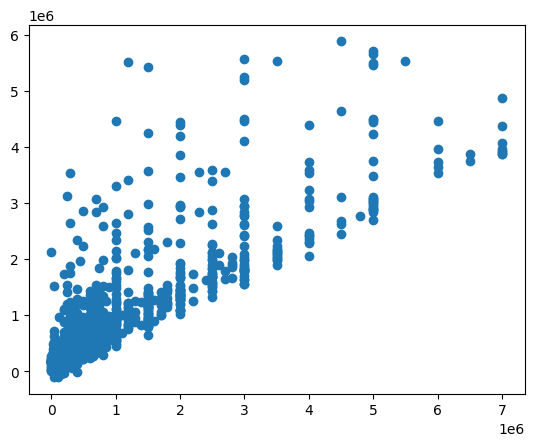

In [55]:
predictions = grid_search.predict(X_test_scaled)
Real_Values = np.array(y_test)
plt.scatter(Real_Values,predictions)


### Residual Histogram

C:\Users\zyad abdallah\AppData\Local\Temp\ipykernel_14260\1326397652.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




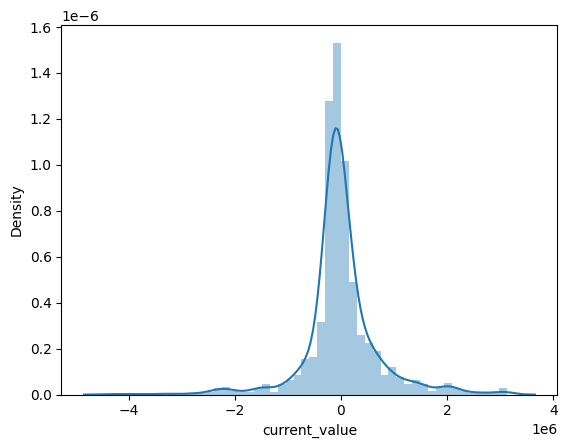

In [56]:
sns.distplot((y_test-predictions),bins=50);